# Piringer Test Modell

In [2]:
def calculate_migration_percent(alpha, D_P, t):
    T = (D_P * t) / (d_P**2)
    
    def calculate_q_n(n, alpha):
        if alpha < 0.1:
            return n * np.pi / (1 + alpha)
        elif alpha > 10:
            return (2 * n - 1) * np.pi / 2
        else:
            return (n - (alpha / (2 * (1 + alpha)))) * np.pi

    sum_a = 0   # Anfang der Summe
    k = 1       # Summand k
    while True:
        q_n = calculate_q_n(k, alpha)
        
        if alpha > 10:
            sum_term_i = (2 / q_n**2) * np.exp(-q_n**2 * (D_P / d_P**2) * t_step)
        else:
            sum_term_i = (2 * alpha * (1 + alpha)) / (1 + alpha + alpha**2 * q_n**2) * np.exp(-q_n**2 * (D_P / d_P**2) * t_step)
            
        sum_before = sum_a
        sum_a += sum_term_i
        
        # Terminierung der unendlichen Summe
        if abs(sum_a - sum_before) < 1e-6:
            break
        k += 1
        
    k_values.append((k, t_step))
        
    # Berechnet Migrationsmenge zu dem Zeitpunkt t_step und Fallunterscheidung abhängig von alpha
    if alpha > 10: 
        migration_amount = c_t * P_density * d_P  * (1 - sum_a)
    else:
        migration_amount = c_t * P_density * d_P * (alpha / (1 + alpha)) * (1 - sum_a)

    # Verhindert negative Konzentrationen
    if migration_amount < 0: 
        migration_amount = 0
        
    return migration_amount, alpha

In [3]:
   def calculate_q_n(n, alpha):
        if alpha < 0.1:
            return n * np.pi / (1 + alpha)
        elif alpha > 10:
            return (2 * n - 1) * np.pi / 2
        else:
            return (n - (alpha / (2 * (1 + alpha)))) * np.pi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha = 0.3 
D_P = 2.1e-10
d_P = 0.01 
t = 3600 * 24 
K_PF = 1
T = (D_P / d_P**2) * t


# Vergleich zwischen Tabelle und berechneten Werten

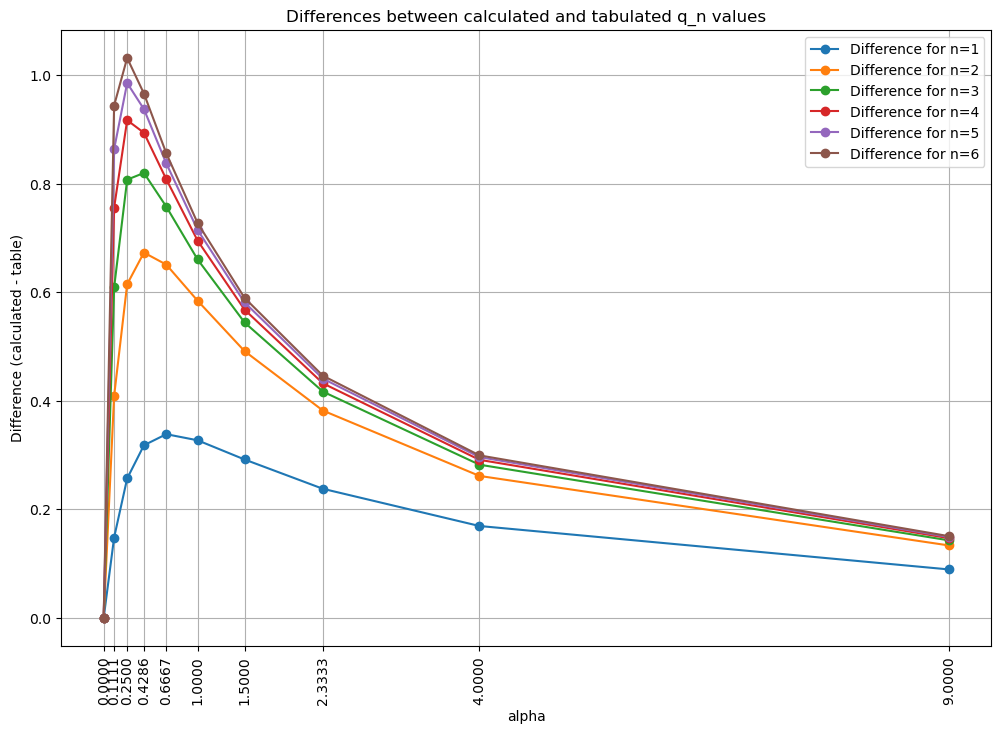

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_q_n(n, alpha):
    if alpha < 0.01:
        return n * np.pi / (1 + alpha)
    elif alpha > 10:
        return (2 * n - 1) * np.pi / 2
    else:
        return (n - (alpha / (2 * (1 + alpha)))) * np.pi
    
# alpha_values = [100.0, 9.0, 4.0, 2.3333, 1.5, 1.0, 0.6667, 0.4286, 0.25, 0.1111, 0.0]
alpha_values = [9.0, 4.0, 2.3333, 1.5, 1.0, 0.6667, 0.4286, 0.25, 0.1111, 0.0]
alpha_values = alpha_values[::-1]

n_values = [1, 2, 3, 4, 5, 6] 

# q_n table
q_values_table = [
    [1.5708, 4.7124, 7.8540, 10.9956, 14.1372, 17.2788],  # alpha = 10000.0
    [1.6385, 4.7359, 7.8681, 11.0057, 14.1451, 17.2852],  # alpha = 9.0000
    [1.7155, 4.7648, 7.8857, 11.0183, 14.1549, 17.2933],  # alpha = 4.0000
    [1.8040, 4.8014, 7.9081, 11.0344, 14.1674, 17.3036],  # alpha = 2.3333
    [1.9071, 4.8490, 7.9378, 11.0558, 14.1841, 17.3173],  # alpha = 1.5000
    [2.0288, 4.9132, 7.9787, 11.0856, 14.2075, 17.3364],  # alpha = 1.0000
    [2.1746, 5.0037, 8.0385, 11.1296, 14.2421, 17.3649],  # alpha = 0.6667
    [2.3521, 5.1386, 8.1334, 11.2010, 14.2990, 17.4119],  # alpha = 0.4286
    [2.5704, 5.3540, 8.3029, 11.3349, 14.4080, 17.5034],  # alpha = 0.2500
    [2.8363, 5.7172, 8.6587, 11.6532, 14.6870, 17.7481],  # alpha = 0.1111
    [3.1416, 6.2832, 9.4248, 12.5664, 15.7080, 18.8496],  # alpha = 0.0000
]

q_values_table = q_values_table[::-1]

# Table to store the results
results = []
# Calculate q_n for each combination of alpha and n and compare with tabulated values
for i, alpha in enumerate(alpha_values):
    row = {"alpha": alpha}
    for j, n in enumerate(n_values):
        calculated_q_n = calculate_q_n(n, alpha)
        tabulated_q_n = q_values_table[i][j]
        row[f"q{n}_calculated"] = calculated_q_n
        row[f"q{n}_table"] = tabulated_q_n
        row[f"q{n}_diff"] = calculated_q_n - tabulated_q_n  # Difference
    results.append(row)

# Create DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
pd.set_option("display.precision", 10)  # Optional: set precision for better readability
df

# Plotting the differences
plt.figure(figsize=(12, 8))

for n in n_values:
    plt.plot(df['alpha'], df[f'q{n}_diff'], marker='o', label=f'Difference for n={n}')

plt.xlabel('alpha')
plt.ylabel('Difference (calculated - table)')
plt.title('Differences between calculated and tabulated q_n values')
plt.xticks(df['alpha'], labels=[f'{alpha:.4f}' for alpha in df['alpha']], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np
import pandas as pd
from scipy.optimize import brentq

# Funktion, die die Gleichung tan(x) + a*x = 0 darstellt
def equation(x, a):
    return np.tan(x) + a * x

# Funktion, um die ersten n positiven Lösungen für ein gegebenes a zu finden
def find_roots(a, n_roots=10):  # Reduzieren Sie die Anzahl der Wurzeln für Effizienz
    roots = []
    interval = np.pi / 2  # Neues Intervall, um die Suche zu steuern

    for i in range(n_roots):
        x_start = i * interval + 0.01  # Start knapp nach einer möglichen Asymptote
        x_end = (i + 1) * interval - 0.01  # Ende knapp vor der nächsten Asymptote

        try:
            root = brentq(equation, x_start, x_end, args=(a,))
            roots.append(root)
        except ValueError:
            roots.append(np.nan)  # Wenn keine Lösung gefunden wird, füge NaN hinzu

    return roots

# Werte von a, für die die Wurzeln berechnet werden sollen
a_values = [0, 1, 1.5, 9]

# Erstellung einer Tabelle mit den ersten 10 Wurzeln für jedes a
root_table = pd.DataFrame()
for a in a_values:
    roots = find_roots(a)
    # Sicherstellen, dass die Anzahl der Wurzeln gleich ist, füllen Sie ggf. mit NaN auf
    roots += [np.nan] * (10 - len(roots))
    root_table[f'a = {a}'] = roots

# Anzeige der Tabelle
print(root_table)


   a = 0          a = 1        a = 1.5          a = 9
0    NaN            NaN            NaN            NaN
1    NaN   2.0287578381   1.9070903939   1.6385051546
2    NaN            NaN            NaN            NaN
3    NaN   4.9131804394   4.8490173240   4.7358463988
4    NaN            NaN            NaN            NaN
5    NaN   7.9786657124   7.9377716192   7.8681024118
6    NaN            NaN            NaN            NaN
7    NaN  11.0855384065  11.0558015265  11.0056697510
8    NaN            NaN            NaN            NaN
9    NaN  14.2074367252  14.1841332518            NaN
